# BLE Proximity Experiment - KNN Regressor
## Experiment based on the measurements of the BLE RSSI values according to the distance to the BLE Estimote beacon

### Imports
Imports of required libraries

In [93]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [94]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [95]:
def replace_features_nan(dataset):
    dataset['rssi_Value'] = dataset['rssi_Value'].replace(0,np.nan)
    dataset['rolling_mean_rssi'] = dataset['rolling_mean_rssi'].replace(0,np.nan)

### Initialize Dataset
Initialization of the data from the file

In [96]:
dataset = load_file('../../dataset_train_university.csv')
positions = dataset['coordinate_Y']
dataset['distance'] = positions
replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-48,-48.000000,Personal,0.0
1,0.0,0.0,-48,-48.000000,Personal,0.0
2,0.0,0.0,-48,-48.000000,Personal,0.0
3,0.0,0.0,-48,-48.000000,Personal,0.0
4,0.0,0.0,-46,-47.600000,Personal,0.0
...,...,...,...,...,...,...
24829,0.0,4.5,-92,-90.480000,Public,4.5
24830,0.0,4.5,-93,-90.576923,Public,4.5
24831,0.0,4.5,-90,-90.555556,Public,4.5
24832,0.0,4.5,-90,-90.535714,Public,4.5


(24834, 6)

### Initialize Test Set

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,4.5,-86,-86.000000,Public,4.5
1,0.0,4.5,-84,-85.000000,Public,4.5
2,0.0,4.5,-83,-84.333333,Public,4.5
3,0.0,4.5,-84,-84.250000,Public,4.5
4,0.0,4.5,-92,-85.800000,Public,4.5
...,...,...,...,...,...,...
3672,0.0,0.0,-57,-56.814815,Personal,0.0
3673,0.0,0.0,-56,-56.785714,Personal,0.0
3674,0.0,0.0,-56,-56.758621,Personal,0.0
3675,0.0,0.0,-56,-56.733333,Personal,0.0


(3677, 6)

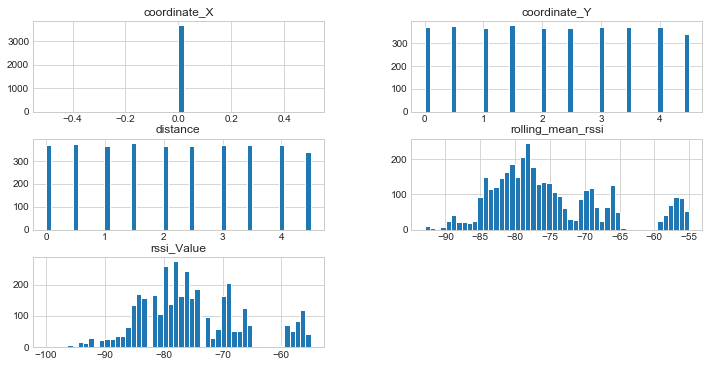

In [97]:
test_dataset = load_file('../../dataset_test_university.csv')
positions = test_dataset['coordinate_Y']
test_dataset['distance'] = positions
replace_features_nan(test_dataset)
display(test_dataset)
display(test_dataset.shape)
test_dataset.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | BIG DATASET SAMSUNG)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-47,-47.000000,Personal,0.0
1,0.0,0.0,-46,-46.500000,Personal,0.0
2,0.0,0.0,-46,-46.333333,Personal,0.0
3,0.0,0.0,-47,-46.500000,Personal,0.0
4,0.0,0.0,-47,-46.600000,Personal,0.0
...,...,...,...,...,...,...
12470,0.0,3.5,-87,-84.555556,Social,3.5
12471,0.0,3.5,-87,-84.684211,Social,3.5
12472,0.0,3.5,-87,-84.800000,Social,3.5
12473,0.0,3.5,-87,-84.904762,Social,3.5


(12475, 6)

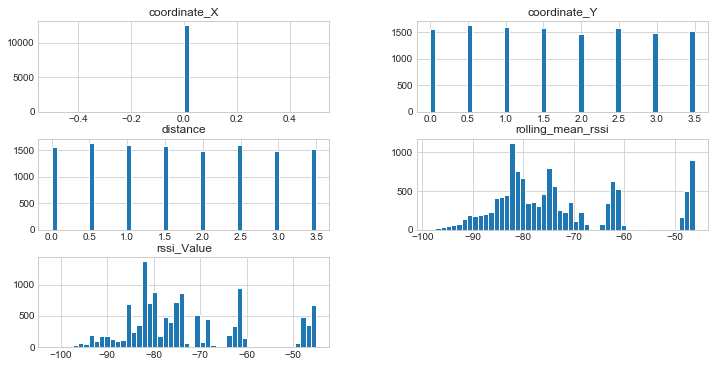

In [98]:
test_dataset_home_big = load_file('../../dataset_test_home_big.csv')
positions = test_dataset_home_big['coordinate_Y']
test_dataset_home_big['distance'] = positions
replace_features_nan(test_dataset_home_big)
display(test_dataset_home_big)
display(test_dataset_home_big.shape)
test_dataset_home_big.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | SMALL DATASET SAMSUNG)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-44,-44.000000,Personal,0.0
1,0.0,0.0,-44,-44.000000,Personal,0.0
2,0.0,0.0,-44,-44.000000,Personal,0.0
3,0.0,0.0,-44,-44.000000,Personal,0.0
4,0.0,0.0,-45,-44.200000,Personal,0.0
...,...,...,...,...,...,...
2279,0.0,3.5,-84,-83.944444,Social,3.5
2280,0.0,3.5,-85,-84.000000,Social,3.5
2281,0.0,3.5,-85,-84.050000,Social,3.5
2282,0.0,3.5,-92,-84.428571,Social,3.5


(2284, 6)

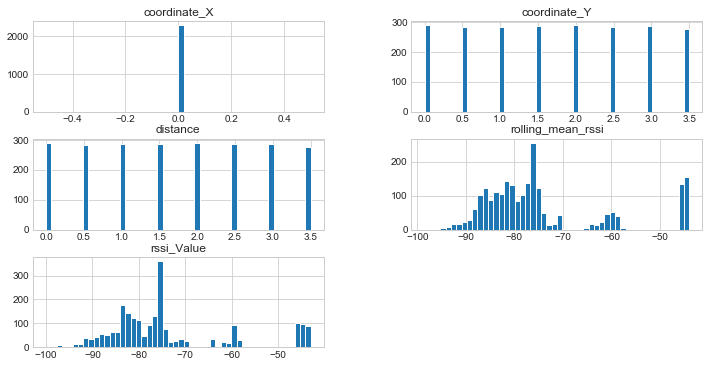

In [99]:
test_dataset_home_small = load_file('../../dataset_test_home.csv')
positions = test_dataset_home_small['coordinate_Y']
test_dataset_home_small['distance'] = positions
replace_features_nan(test_dataset_home_small)
display(test_dataset_home_small)
display(test_dataset_home_small.shape)
test_dataset_home_small.hist(bins=50,figsize=(12,6))
plt.show()

### Initialize Test Set (HOME | SMALL DATASET ASUS)

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,distance
0,0.0,0.0,-50,-50.000000,Personal,0.0
1,0.0,0.0,-50,-50.000000,Personal,0.0
2,0.0,0.0,-53,-51.000000,Personal,0.0
3,0.0,0.0,-51,-51.000000,Personal,0.0
4,0.0,0.0,-53,-53.000000,Personal,0.0
...,...,...,...,...,...,...
410,0.0,3.5,-86,-83.800000,Social,3.5
411,0.0,3.5,-88,-84.500000,Social,3.5
412,0.0,3.5,-84,-84.428571,Social,3.5
413,0.0,3.5,-83,-84.250000,Social,3.5


(415, 6)

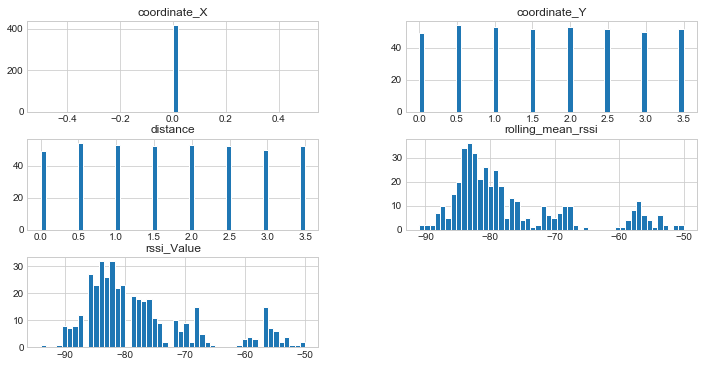

In [100]:
test_dataset_home_asus = load_file('../../dataset_test_home_asus.csv')
positions = test_dataset_home_asus['coordinate_Y']
test_dataset_home_asus['distance'] = positions
replace_features_nan(test_dataset_home_asus)
display(test_dataset_home_asus)
display(test_dataset_home_asus.shape)
test_dataset_home_asus.hist(bins=50,figsize=(12,6))
plt.show()

### Dataset Overall Info

In [101]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24834 entries, 0 to 24833
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coordinate_X       24834 non-null  float64
 1   coordinate_Y       24834 non-null  float64
 2   rssi_Value         24834 non-null  int64  
 3   rolling_mean_rssi  24834 non-null  float64
 4   zone               24834 non-null  object 
 5   distance           24834 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


None

### File Overall Description
Usage of describe pandas function on the dataset

In [102]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
coordinate_X,24834.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
coordinate_Y,24834.0,2.210196,1.436557,0.0,1.000000,2.0,3.500000,4.5
rssi_Value,24834.0,-76.687243,11.255077,-102.0,-84.000000,-78.0,-73.000000,-46.0
rolling_mean_rssi,24834.0,-76.677952,10.969519,-99.0,-83.666667,-78.5,-73.767308,-46.0
distance,24834.0,2.210196,1.436557,0.0,1.000000,2.0,3.500000,4.5


### % of Missing Values

In [103]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_values_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    missing_percentage = (dataset.isnull().sum() / dataset.count())
    missing_percentage_dataset = pd.DataFrame(missing_percentage,columns=['% of Missing Values'])
    missing_dataset = missing_values_dataset.join(missing_percentage_dataset)
    display(missing_dataset)

In [104]:
compute_missing_values(dataset)

,Missing Values,% of Missing Values
coordinate_X,0,0.0
coordinate_Y,0,0.0
rssi_Value,0,0.0
rolling_mean_rssi,0,0.0
zone,0,0.0
distance,0,0.0


### Overall Histogram of dataset atributes

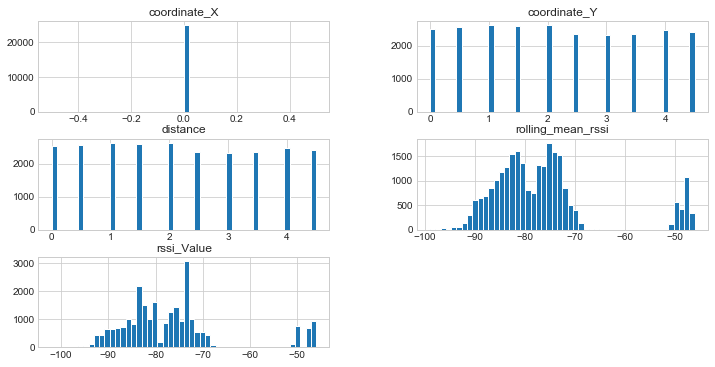

In [105]:
dataset.hist(bins=50,figsize=(12,6))
plt.show()

### Target Attribute - Distance
Graphical display of the distances beacon/smartphone scanned in the experiment

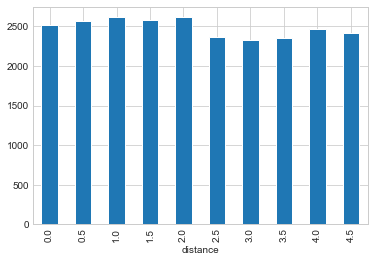

In [106]:
reference_points = dataset.groupby(['distance'])
reference_points.size().plot(kind="bar")

### Beacon RSSI Display
Graphical display of the rssi values recorded at each position

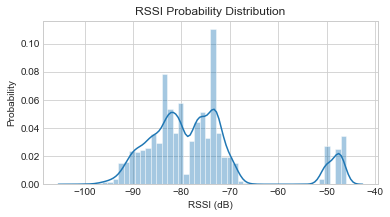

In [107]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset['rssi_Value'])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Beacon Rolling Mean RSSI Display
Graphical adisplay of the rolling mean value recorded at each position

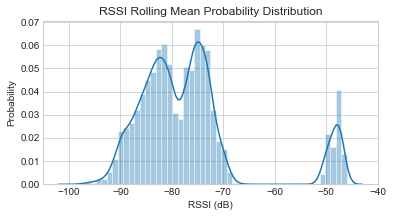

In [108]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset['rolling_mean_rssi'])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Graphical Display of RSSI/Rolling Mean Distribution
Graphical display of the previous measures - rssi and rolling mean

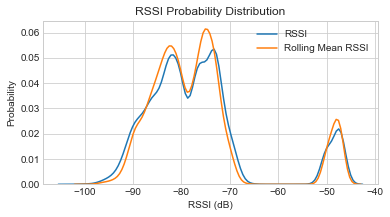

In [109]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')
# The KDE plot for the RSSI column
sns.kdeplot(dataset['rssi_Value'], label='RSSI')
# The KDE plot for the Rolling Mean column
sns.kdeplot(dataset['rolling_mean_rssi'], label='Rolling Mean RSSI')
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Valures frange from -1 to 1. Close to 1 means a strong positive correlation.

In [110]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)
    display(corr_matrix['distance'].sort_values(ascending=False))
    attributes = ["distance","rssi_Value", "rolling_mean_rssi"]
    scatter_matrix(dataset[attributes], figsize=(12, 8))

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,distance
coordinate_X,NaN,NaN,NaN,NaN,NaN
coordinate_Y,NaN,1.000000,-0.723705,-0.741381,1.000000
rssi_Value,NaN,-0.723705,1.000000,0.958999,-0.723705
rolling_mean_rssi,NaN,-0.741381,0.958999,1.000000,-0.741381
distance,NaN,1.000000,-0.723705,-0.741381,1.000000


distance             1.000000
coordinate_Y         1.000000
rssi_Value          -0.723705
rolling_mean_rssi   -0.741381
coordinate_X              NaN
Name: distance, dtype: float64

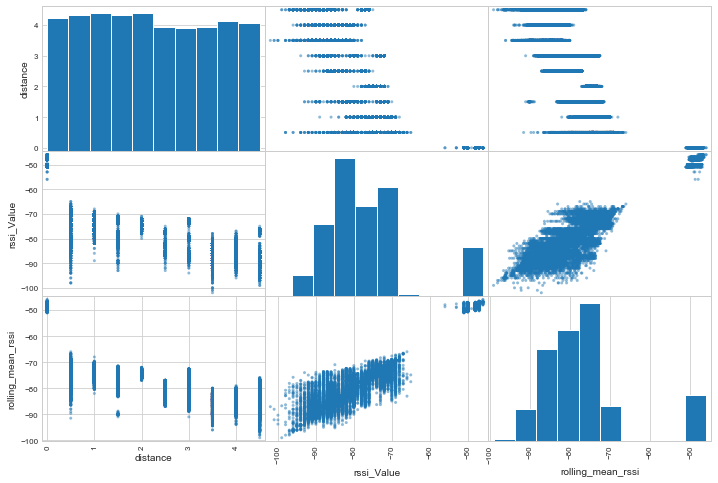

In [111]:
compute_correlations(dataset)

### Data Cleaning
Fill in missing values and fix/remove outliers

In [112]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [113]:
compute_data_cleaning(dataset,'rssi_Value')
compute_data_cleaning(dataset,'rolling_mean_rssi')
compute_data_cleaning(test_dataset,'rssi_Value')
compute_data_cleaning(test_dataset,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_big,'rssi_Value')
compute_data_cleaning(test_dataset_home_big,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_small,'rssi_Value')
compute_data_cleaning(test_dataset_home_small,'rolling_mean_rssi')
compute_data_cleaning(test_dataset_home_asus,'rssi_Value')
compute_data_cleaning(test_dataset_home_asus,'rolling_mean_rssi')

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [114]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [115]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
24829,Public
24830,Public
24831,Public
24832,Public


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
categorical_zone = test_dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset['labels'] = test_changed

Previous Categorical Data


,zone
0,Public
1,Public
2,Public
3,Public
4,Public
...,...
3672,Personal
3673,Personal
3674,Personal
3675,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
categorical_zone = test_dataset_home_big[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_big['labels'] = test_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
12470,Social
12471,Social
12472,Social
12473,Social


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
categorical_zone = test_dataset_home_small[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_small['labels'] = test_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
2279,Social
2280,Social
2281,Social
2282,Social


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
categorical_zone = test_dataset_home_asus[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
test_changed = compute_encoder(categorical_zone,1)
print("After One Hot Encoder")
test_dataset_home_asus['labels'] = test_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
410,Social
411,Social
412,Social
413,Social


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Training Data
Training Data intialization for predictions purposes

In [120]:
train_X_rssi = pd.DataFrame(dataset['rssi_Value']).values.reshape(-1,1)
display(train_X_rssi.shape)
train_X_rolling_mean = pd.DataFrame(dataset['rolling_mean_rssi']).values.reshape(-1,1)
display(train_X_rolling_mean.shape)
combination_features_X = dataset[['rssi_Value','rolling_mean_rssi']]
display(combination_features_X.shape)
default_groups = dataset['labels'].values.reshape(-1,1)

(24834, 1)

(24834, 1)

(24834, 2)

In [121]:
train_Y = pd.DataFrame(dataset['distance']).values.reshape(-1,1)
display(train_Y.shape)

(24834, 1)

In [122]:
data_plot_means = dataset.groupby(['distance'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
distance,,
0.0,-48.351984,-48.325565
0.5,-75.304314,-75.253245
1.0,-74.156908,-74.155786
1.5,-78.266151,-78.279493
2.0,-74.711171,-74.732949
2.5,-82.396866,-82.373984
3.0,-79.297379,-79.557064
3.5,-86.335602,-86.250861
4.0,-84.817666,-84.750632


### Plot Training Data
Graphical Display of the observations in the dataset

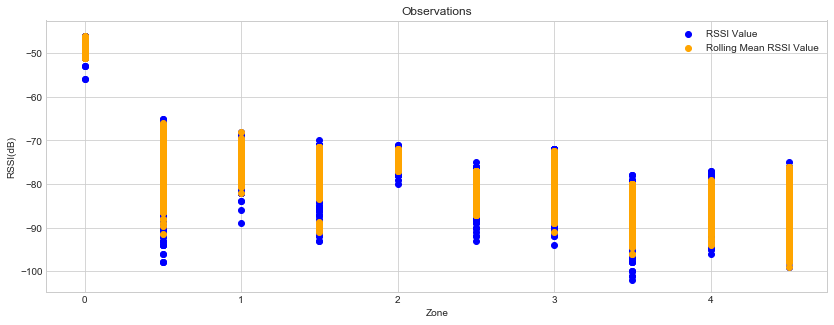

In [123]:
plt.figure(figsize=(14,5))
plt.scatter(dataset['distance'],dataset['rssi_Value'],label='RSSI Value',color='blue')
plt.scatter(dataset['distance'],dataset['rolling_mean_rssi'],label='Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Test Data

In [124]:
test_X_rssi = pd.DataFrame(test_dataset['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi.shape)
test_X_rolling_mean = pd.DataFrame(test_dataset['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean.shape)
test_combination_features_X = test_dataset[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X.shape)

(3677, 1)

(3677, 1)

(3677, 2)

In [125]:
test_Y = pd.DataFrame(test_dataset['distance']).values.reshape(-1,1)
display(test_Y.shape)

(3677, 1)

In [126]:
data_plot_means = test_dataset.groupby(['distance'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
distance,,
0.0,-57.010811,-56.935533
0.5,-67.061170,-66.866788
1.0,-75.950685,-76.102343
1.5,-74.568783,-74.328086
2.0,-79.493151,-79.722828
2.5,-76.904891,-76.593561
3.0,-79.255376,-79.142332
3.5,-81.024194,-80.634009
4.0,-80.708108,-80.924987


In [127]:
test_X_rssi_home_big = pd.DataFrame(test_dataset_home_big['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_big.shape)
test_X_rolling_mean_home_big = pd.DataFrame(test_dataset_home_big['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_big.shape)
test_combination_features_X_home_big = test_dataset_home_big[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_big.shape)

(12475, 1)

(12475, 1)

(12475, 2)

In [128]:
test_Y_home_big = pd.DataFrame(test_dataset_home_big['distance']).values.reshape(-1,1)
display(test_Y_home_big .shape)

(12475, 1)

In [129]:
data_plot_means = test_dataset_home_big.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-60.626277,-60.688594
Social,-81.402474,-81.424138


In [130]:
test_X_rssi_home_small = pd.DataFrame(test_dataset_home_small['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_small.shape)
test_X_rolling_mean_home_small = pd.DataFrame(test_dataset_home_small['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_small.shape)
test_combination_features_X_home_small = test_dataset_home_small[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_small.shape)

(2284, 1)

(2284, 1)

(2284, 2)

In [131]:
test_Y_home_small = pd.DataFrame(test_dataset_home_small['distance']).values.reshape(-1,1)
display(test_Y_home_small .shape)

(2284, 1)

In [132]:
data_plot_means = test_dataset_home_small.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-63.987165,-64.275969
Social,-80.535389,-80.579521


In [133]:
test_X_rssi_home_asus = pd.DataFrame(test_dataset_home_asus['rssi_Value']).values.reshape(-1,1)
display(test_X_rssi_home_asus.shape)
test_X_rolling_mean_home_asus = pd.DataFrame(test_dataset_home_asus['rolling_mean_rssi']).values.reshape(-1,1)
display(test_X_rolling_mean_home_asus.shape)
test_combination_features_X_home_asus = test_dataset_home_asus[['rssi_Value','rolling_mean_rssi']]
display(test_combination_features_X_home_asus.shape)

(415, 1)

(415, 1)

(415, 2)

In [134]:
test_Y_home_asus = pd.DataFrame(test_dataset_home_asus['distance']).values.reshape(-1,1)
display(test_Y_home_small .shape)

(2284, 1)

In [135]:
data_plot_means = test_dataset_home_asus.groupby(['zone'])[['rssi_Value','rolling_mean_rssi']].mean()
display(data_plot_means)

,rssi_Value,rolling_mean_rssi
zone,,
Personal,-69.205128,-69.220368
Social,-82.181467,-82.010114


### Plot Test Data

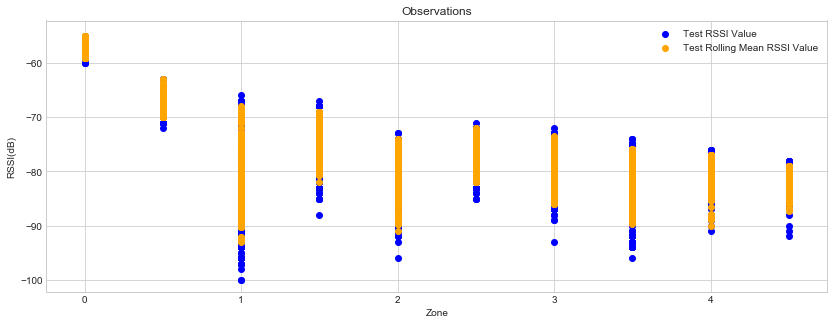

In [136]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset['distance'],test_dataset['rssi_Value'],label='Test RSSI Value',color='blue')
plt.scatter(test_dataset['distance'],test_dataset['rolling_mean_rssi'],label='Test Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

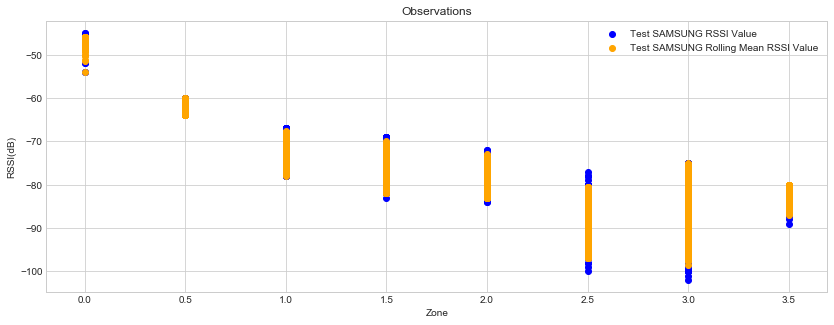

In [137]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_big['distance'],test_dataset_home_big['rssi_Value'],label='Test SAMSUNG RSSI Value',color='blue')
plt.scatter(test_dataset_home_big['distance'],test_dataset_home_big['rolling_mean_rssi'],label='Test SAMSUNG Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

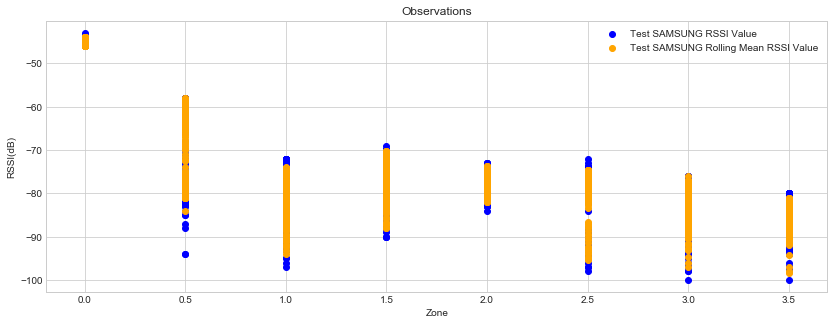

In [138]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_small['distance'],test_dataset_home_small['rssi_Value'],label='Test SAMSUNG RSSI Value',color='blue')
plt.scatter(test_dataset_home_small['distance'],test_dataset_home_small['rolling_mean_rssi'],label='Test SAMSUNG Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

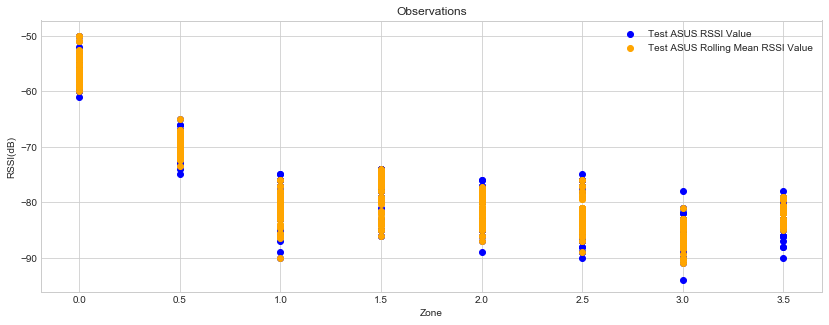

In [139]:
plt.figure(figsize=(14,5))
plt.scatter(test_dataset_home_asus['distance'],test_dataset_home_asus['rssi_Value'],label='Test ASUS RSSI Value',color='blue')
plt.scatter(test_dataset_home_asus['distance'],test_dataset_home_asus['rolling_mean_rssi'],label='Test ASUS Rolling Mean RSSI Value',color='orange')
plt.title('Observations')  
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Hyperparameters for tunning

In [140]:
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
distance_metris = ["euclidean", "manhattan", "canberra", "braycurtis"]
algorithms = ["brute","kd_tree","ball_tree","auto"]
weights = ["uniform","distance"]
knn_basic = KNeighborsRegressor()
print("DEFAULT HYPERPARAMETERS")
default_params = knn_basic.get_params()
display(pd.DataFrame(default_params,index=[1])) 

DEFAULT HYPERPARAMETERS


,algorithm,leaf_size,metric,metric_params,n_jobs,n_neighbors,p,weights
1,auto,30,minkowski,None,None,5,2,uniform


### Statistics Output Format
Structure of the statistical output of each call to the machine learning algorithm

In [141]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.16121665, 0.83878335])

rolling_mean_rssi    0.838783
rssi_Value           0.161217
dtype: float64

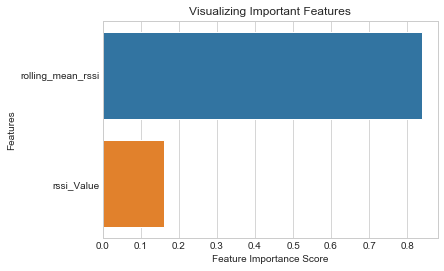

In [142]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(combination_features_X,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=combination_features_X.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - KNN Regression Mode

In [143]:
def compute_KNN_with_Regressor(flag=0,trainX_data = None, trainY_data = None,testX_data = None,testY_data = None, scaler = None,
                cross_validation = None,n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
                metric_params=None, n_jobs=-1):
    knn_regression_estimator = KNeighborsRegressor(n_neighbors,weights,algorithm,leaf_size,p,metric,metric_params,n_jobs)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,knn_regression_estimator)
    else:
        main_estimator = knn_regression_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    statistical_array = list()
    error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    observed_errors = error_dataframe['Predicted'] - error_dataframe['Actual']
    error = pd.DataFrame(observed_errors, columns=["error"])
    result = pd.DataFrame(train_Y,columns=["distance"]).join(error)
    return structure_data(result,coefficient_determination)


#### Check Training model with no cross validation
Use KNN Regressor to check the results on the training data alone

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
24829,4.5,2.9
24830,4.5,3.9
24831,4.5,3.8
24832,4.5,3.8


,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
24829,4.5,4.5
24830,4.5,3.9
24831,4.5,4.3
24832,4.5,4.1


,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
24829,4.5,4.2
24830,4.5,4.2
24831,4.5,4.1
24832,4.5,4.3


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.417190,0.437650,0.661551,0.661564,-0.2,0.0,0.1,1.0,-3.0,3.5,0.787921,Both
1,0.604176,0.735010,0.857328,0.857330,-0.4,0.0,0.3,1.4,-3.7,4.0,0.643824,Rolling Mean RSSI
0,0.754897,1.118155,1.057428,0.999780,-0.9,-0.1,0.1,1.1,-3.2,3.4,0.458157,RSSI Only


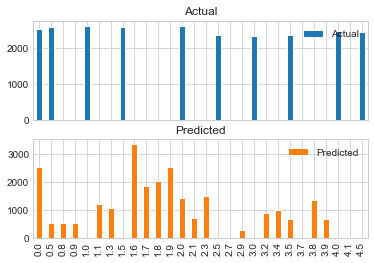

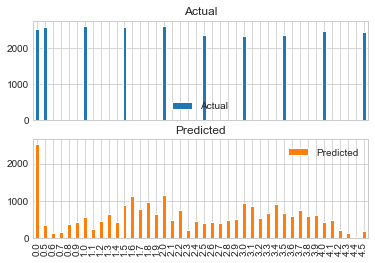

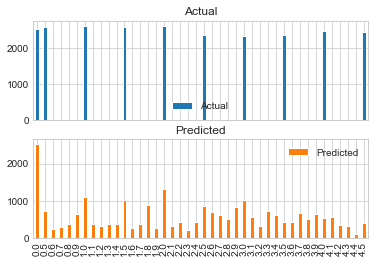

In [144]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    result = compute_KNN_with_Regressor(flag=1,trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

#### Experiment - KNN with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [145]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
cross_validation_list = np.arange(2,6)
results = list()
for feature in types:
    
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for cv in cross_validation_list:
        skf = StratifiedKFold(n_splits=cv)
        splited = skf.split(trainX_data,default_groups)
        result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
10,0.630881,0.796738,0.892602,0.892620,-0.5,0.0,0.3,1.5,-3.8,4.0,0.613911,4,Both
11,0.670548,0.863316,0.929148,0.929162,-0.5,0.0,0.3,1.6,-3.8,4.0,0.581648,5,Both
9,0.750656,0.920179,0.959259,0.946081,-0.5,0.1,0.6,1.7,-3.8,4.0,0.554093,3,Both
6,0.751168,1.015461,1.007701,1.007719,-0.6,0.0,0.5,1.7,-3.8,4.0,0.507921,4,Rolling Mean RSSI
7,0.772211,1.054729,1.027000,1.027020,-0.6,0.0,0.5,1.7,-3.8,4.0,0.488892,5,Rolling Mean RSSI
3,0.786349,1.142172,1.068724,1.057044,-0.7,0.0,0.2,1.7,-3.4,4.0,0.446518,5,RSSI Only
2,0.809398,1.134109,1.064945,1.052630,-0.8,0.0,0.4,1.4,-3.5,3.6,0.450426,4,RSSI Only
1,0.815906,1.002564,1.001281,1.001268,-0.7,0.1,0.5,1.5,-3.2,3.8,0.514171,3,RSSI Only
8,0.821595,1.074010,1.036345,1.029394,-0.9,0.0,0.5,1.5,-3.8,4.0,0.479549,2,Both
5,0.825687,1.082233,1.040304,1.037045,-0.6,0.1,0.5,1.7,-4.0,4.0,0.475564,3,Rolling Mean RSSI


Number of Folds:  4


#### Experiment - KNN with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [146]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
19,0.489430,0.579191,0.761046,0.760907,-0.3,0.0,0.2,1.3,-3.6,4.0,0.715542,0.2,Both
18,0.490942,0.597975,0.773288,0.772695,-0.3,0.0,0.2,1.3,-3.6,4.0,0.704522,0.1,Both
20,0.492833,0.577215,0.759747,0.759574,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719266,0.3,Both
25,0.496648,0.578844,0.760818,0.760650,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719101,0.8,Both
21,0.498701,0.594996,0.771360,0.771241,-0.3,0.0,0.2,1.3,-3.7,4.0,0.710901,0.4,Both
26,0.499642,0.587990,0.766805,0.766627,-0.3,0.0,0.2,1.2,-3.6,4.0,0.715001,0.9,Both
24,0.501058,0.605290,0.778004,0.777538,-0.3,0.0,0.2,1.3,-3.7,4.0,0.706279,0.7,Both
23,0.501174,0.595900,0.771945,0.771963,-0.3,0.0,0.2,1.3,-3.7,4.0,0.710914,0.6,Both
22,0.501796,0.595155,0.771463,0.771441,-0.3,0.0,0.2,1.3,-3.7,4.0,0.711329,0.5,Both
6,0.649804,0.870613,0.933067,0.932252,-0.4,0.0,0.4,1.6,-3.2,3.8,0.577530,0.7,RSSI Only


#### Experiment - KNN with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [147]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
0,1.294181,2.193595,1.481079,1.480995,-1.1,0.3,1.0,1.8,-3.2,3.7,-0.062987,RSSI Only
2,1.295832,2.141888,1.463519,1.461831,-1.0,0.5,1.0,2.0,-4.0,4.0,-0.037931,Both
1,1.304421,2.152624,1.467182,1.456293,-1.1,0.5,1.3,2.3,-3.9,4.0,-0.043133,Rolling Mean RSSI


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using KNN

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
7,0.492833,0.577215,0.759747,0.759574,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719266,HoldOut,Both
8,0.630881,0.796738,0.892602,0.892620,-0.5,0.0,0.3,1.5,-3.8,4.0,0.613911,Stratified K-Fold,Both
1,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,HoldOut,RSSI Only
4,0.668179,0.869118,0.932265,0.932176,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577296,HoldOut,Rolling Mean RSSI
5,0.751168,1.015461,1.007701,1.007719,-0.6,0.0,0.5,1.7,-3.8,4.0,0.507921,Stratified K-Fold,Rolling Mean RSSI
2,0.809398,1.134109,1.064945,1.052630,-0.8,0.0,0.4,1.4,-3.5,3.6,0.450426,Stratified K-Fold,RSSI Only
0,1.294181,2.193595,1.481079,1.480995,-1.1,0.3,1.0,1.8,-3.2,3.7,-0.062987,LOO,RSSI Only
6,1.295832,2.141888,1.463519,1.461831,-1.0,0.5,1.0,2.0,-4.0,4.0,-0.037931,LOO,Both
3,1.304421,2.152624,1.467182,1.456293,-1.1,0.5,1.3,2.3,-3.9,4.0,-0.043133,LOO,Rolling Mean RSSI


Selected cross validation method:  HoldOut


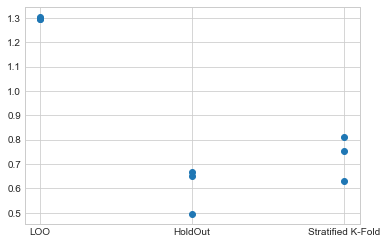

In [148]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    holdout = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    loo = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'],'o')
selected_method = statistics.sort_values(by=['mae'])['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [149]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc,type
11,0.491585,0.575238,0.758445,0.758212,-0.3,0.0,0.2,1.3,-3.7,4.0,0.720227,None,None,Both
8,0.492833,0.577215,0.759747,0.759574,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719266,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
10,0.496980,0.580612,0.761979,0.761870,-0.3,0.0,0.2,1.3,-3.7,4.0,0.717614,MaxAbsScaler,MaxAbsScaler(copy=True),Both
9,0.497276,0.581186,0.762356,0.762245,-0.3,0.0,0.2,1.3,-3.7,4.0,0.717334,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
0,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",RSSI Only
1,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",RSSI Only
2,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,MaxAbsScaler,MaxAbsScaler(copy=True),RSSI Only
3,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,None,None,RSSI Only
4,0.668179,0.869118,0.932265,0.932176,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577296,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Rolling Mean RSSI
7,0.668179,0.869118,0.932265,0.932176,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577296,None,None,Rolling Mean RSSI


Selected Preprocessing:  None


#### Experiment -  Running the KNN function with the different weights

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,weights,type
4,0.492833,0.577215,0.759747,0.759574,-0.300000,0.0,0.200000,1.300000,-3.7,4.0,0.719266,uniform,Both
5,0.508762,0.663584,0.814607,0.814444,-0.259274,0.0,0.155172,1.380295,-4.0,4.0,0.677259,distance,Both
1,0.651268,0.831875,0.912072,0.912098,-0.600000,0.0,0.400000,1.700000,-3.2,4.0,0.595409,distance,RSSI Only
0,0.651429,0.832068,0.912178,0.912203,-0.600000,0.0,0.400000,1.700000,-3.2,4.0,0.595315,uniform,RSSI Only
2,0.668179,0.869118,0.932265,0.932176,-0.500000,0.0,0.400000,1.500000,-3.4,4.0,0.577296,uniform,Rolling Mean RSSI
3,0.694698,0.974786,0.987312,0.987345,-0.500000,0.0,0.400000,1.600000,-4.0,4.0,0.525903,distance,Rolling Mean RSSI


Selected weight:  uniform


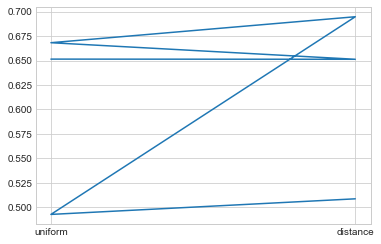

In [150]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','weights','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for weight in weights:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               weights=weight)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               weights=weight)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),weights=weight)
        result.append(weight)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['weights'],statistics['mae'])
selected_weight = statistics.sort_values(by=['mae'])['weights'].head(1).values[0]
print("Selected weight: ",selected_weight)

#### Experiment - Running the KNN function with the different algorithms

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,algorithm,type
9,0.492833,0.577215,0.759747,0.759574,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719266,kd_tree,Both
11,0.492833,0.577215,0.759747,0.759574,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719266,auto,Both
10,0.492981,0.577955,0.760233,0.760066,-0.3,0.0,0.2,1.3,-3.7,4.0,0.718906,ball_tree,Both
8,0.494819,0.581950,0.762857,0.762651,-0.3,0.0,0.2,1.3,-3.7,4.0,0.716963,brute,Both
1,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,kd_tree,RSSI Only
2,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,ball_tree,RSSI Only
3,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,auto,RSSI Only
4,0.665669,0.861402,0.928118,0.928075,-0.4,0.0,0.4,1.5,-3.4,4.0,0.581048,brute,Rolling Mean RSSI
6,0.668139,0.868639,0.932008,0.931927,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577529,ball_tree,Rolling Mean RSSI
5,0.668179,0.869118,0.932265,0.932176,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577296,kd_tree,Rolling Mean RSSI


Selected algorithm:  kd_tree


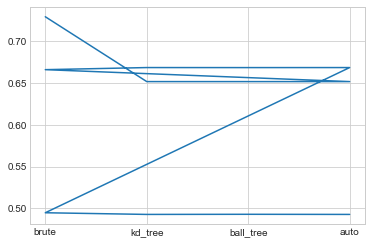

In [151]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','algorithm','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for algorithm in algorithms:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               algorithm=algorithm)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               algorithm=algorithm)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),algorithm=algorithm)
        result.append(algorithm)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['algorithm'],statistics['mae'])
selected_algorithm = statistics.sort_values(by=['mae'])['algorithm'].head(1).values[0]
print("Selected algorithm: ",selected_algorithm)

#### Experiment - Running the KNN function with the different distance metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,distance,type
8,0.492833,0.577215,0.759747,0.759574,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719266,euclidean,Both
9,0.493021,0.577505,0.759938,0.759763,-0.3,0.0,0.2,1.3,-3.7,4.0,0.719125,manhattan,Both
11,0.493222,0.578505,0.760595,0.760430,-0.3,0.0,0.2,1.3,-3.7,4.0,0.718638,braycurtis,Both
10,0.494390,0.578810,0.760795,0.760610,-0.3,0.0,0.2,1.3,-3.7,4.0,0.718490,canberra,Both
0,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,euclidean,RSSI Only
1,0.651429,0.832068,0.912178,0.912203,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595315,manhattan,RSSI Only
2,0.651456,0.832138,0.912216,0.912241,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595282,canberra,RSSI Only
3,0.651456,0.832138,0.912216,0.912241,-0.6,0.0,0.4,1.7,-3.2,4.0,0.595282,braycurtis,RSSI Only
4,0.668179,0.869118,0.932265,0.932176,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577296,euclidean,Rolling Mean RSSI
5,0.668179,0.869118,0.932265,0.932176,-0.5,0.0,0.4,1.5,-3.4,4.0,0.577296,manhattan,Rolling Mean RSSI


Selected distance:  euclidean


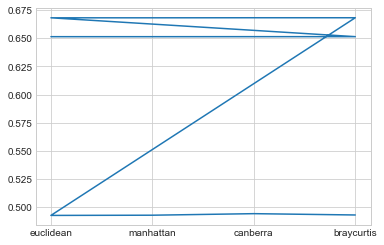

In [152]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','distance','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    for distance in distance_metris:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               metric=distance)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                               metric=distance)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            result = compute_KNN_with_Regressor(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                scaler=StandardScaler(),metric=distance)
        result.append(distance)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['distance'],statistics['mae'])
selected_distance = statistics.sort_values(by=['mae'])['distance'].head(1).values[0]
print("Selected distance: ",selected_distance)

#### Experiment - Tuning the K parameter

{'knn__n_neighbors': 7}
Max accuracy:  -10.102778610913093
{'knn__n_neighbors': 30}
Max accuracy:  -10.01031422764047
{'knn__n_neighbors': 30}
Max accuracy:  -9.576996487473664


,n_neighbhors,type
0,7,RSSI Only
1,30,Rolling Mean RSSI
2,30,Both


Text(0, 0.5, 'Cross-validated accuracy')

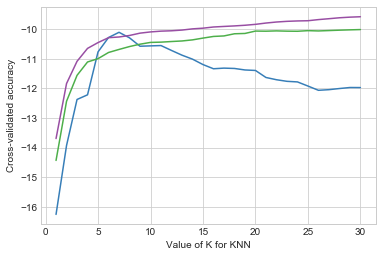

In [153]:
statistical_cols = ['n_neighbhors','type']
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X 
    result = list()
    knn_regressor_estimator = KNeighborsRegressor() #init knn regressor estimator
    param_grid = {'knn__n_neighbors': k_range}
    # Create a pipeline
    pipe = Pipeline([('standardizer', StandardScaler()), ('knn', knn_regressor_estimator)])
    estimator = GridSearchCV(pipe, param_grid,cv=selected_fold)
    #fit model to data
    estimator.fit(trainX_data,train_Y)
    print(estimator.best_params_)
    grid_mean_scores = estimator.cv_results_['mean_test_score']
    print('Max accuracy: ', max(grid_mean_scores))
    grid_result = [grid_mean_scores]
    result.append(estimator.best_params_['knn__n_neighbors'])
    result.append(feature)
    results.append(result)
    grid_results.append(grid_result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics)
for grid in grid_results:
    num+=1
    plt.plot(k_range, grid[0],color=palette(num))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

### Run RandomizedSearchCV for parameter tunning

In [154]:
types = ['RSSI Only','Rolling Mean RSSI','Both']
results = list()
num = 0
palette = plt.get_cmap('Set1')
grid_results = list()
k_range = list(range(1, 31))
tuned_parameters = {
    'knn__n_neighbors': k_range,
    'knn__metric':distance_metris,
    'knn__weights':weights,
    'knn__algorithm':['auto']
}
scores = ['r2']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'RSSI Only':
            trainX_data = train_X_rssi
        elif feature == 'Rolling Mean RSSI':
            trainX_data = train_X_rolling_mean
        else:
            trainX_data = combination_features_X 
        pipe = Pipeline([('standardizer', StandardScaler()), ('knn', KNeighborsRegressor())])
        clf = RandomizedSearchCV(pipe, tuned_parameters,n_iter=150,cv=StratifiedKFold(n_splits=selected_fold, shuffle=True, random_state=42).split(trainX_data, default_groups),scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y)
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for r2

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   35.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.2min finished


,knn__weights,knn__n_neighbors,knn__metric,knn__algorithm,score,best_score,type
2,uniform,30,manhattan,auto,r2,0.751135,Both
1,uniform,30,braycurtis,auto,r2,0.633118,Rolling Mean RSSI
0,distance,29,manhattan,auto,r2,0.519861,RSSI Only


### Best Parameters
Display the best parameters tunned throughout the experiments

In [158]:
conclusion_cols=['K Parameter','Cross Validation','Weight','Preprocessing','Algorithm','Distance']
conclusion_list = [30,selected_method,selected_weight,selected_preprocessing,selected_algorithm,selected_distance]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,K Parameter,Cross Validation,Weight,Preprocessing,Algorithm,Distance
0,30,HoldOut,uniform,None,kd_tree,euclidean


### Best Results
Compute KNN with the best parameters in both RSSI and Rolling Mean

In [173]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','typeTuning']
tunningTypes=['Manual','RandomizedSearchCV']
results = list()
final_results = list()
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
    else:
        trainX_data = combination_features_X
    for tuneType in tunningTypes:
        if tuneType == 'RandomizedSearchCV':
            selected_algorithm_param = gridcv_results.head(1)['knn__algorithm'].values[0]
            selected_distance_param = gridcv_results.head(1)['knn__metric'].values[0]
            selected_weight_param = gridcv_results.head(1)['knn__weights'].values[0]
            selected_knn_param = gridcv_results.head(1)['knn__n_neighbors'].values[0]
        else:
            selected_algorithm_param = selected_algorithm
            selected_distance_param = selected_distance
            selected_weight_param = selected_weight
            selected_knn_param = 30
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_KNN_with_Regressor(n_neighbors=selected_knn_param,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_KNN_with_Regressor(n_neighbors=selected_knn_param,testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),
                                                 cross_validation = splited,
                                algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            result = compute_KNN_with_Regressor(n_neighbors=selected_knn_param,trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
        result.append(feature)
        result.append(tuneType)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,typeTuning
5,0.478128,0.502622,0.708959,0.708821,-0.316667,0.0,0.233333,1.133333,-3.383333,3.750000,0.755545,Both,RandomizedSearchCV
4,0.478591,0.503106,0.709300,0.709153,-0.316667,0.0,0.233333,1.133333,-3.250000,3.766667,0.755309,Both,Manual
2,0.633443,0.743496,0.862262,0.861980,-0.433333,0.0,0.400000,1.433333,-3.433333,3.416667,0.638393,Rolling Mean RSSI,Manual
3,0.633443,0.743496,0.862262,0.861980,-0.433333,0.0,0.400000,1.433333,-3.433333,3.416667,0.638393,Rolling Mean RSSI,RandomizedSearchCV
0,0.650828,0.789285,0.888417,0.888469,-0.533333,0.0,0.333333,1.633333,-2.750000,3.566667,0.616124,RSSI Only,Manual
1,0.650828,0.789285,0.888417,0.888469,-0.533333,0.0,0.333333,1.633333,-2.750000,3.566667,0.616124,RSSI Only,RandomizedSearchCV


### Best Results - Testing data (Different Beacon)
Experiment with testing dataset

,Actual,Predicted
0,4.5,2.700000
1,4.5,2.816667
2,4.5,2.300000
3,4.5,2.816667
4,4.5,3.633333
...,...,...
3672,0.0,0.000000
3673,0.0,0.000000
3674,0.0,0.000000
3675,0.0,0.000000


,Actual,Predicted
0,4.5,3.5
1,4.5,3.5
2,4.5,3.5
3,4.5,3.5
4,4.5,3.5
...,...,...
3672,0.0,3.5
3673,0.0,3.5
3674,0.0,3.5
3675,0.0,3.5


,Actual,Predicted
0,4.5,3.633333
1,4.5,3.633333
2,4.5,3.633333
3,4.5,3.633333
4,4.5,3.633333
...,...,...
3672,0.0,3.633333
3673,0.0,3.633333
3674,0.0,3.633333
3675,0.0,3.633333


,Actual,Predicted
0,4.5,3.5
1,4.5,3.5
2,4.5,3.5
3,4.5,3.5
4,4.5,3.5
...,...,...
3672,0.0,3.5
3673,0.0,3.5
3674,0.0,3.5
3675,0.0,3.5


,Actual,Predicted
0,4.5,2.900000
1,4.5,3.483333
2,4.5,3.250000
3,4.5,3.300000
4,4.5,3.133333
...,...,...
3672,0.0,0.000000
3673,0.0,0.000000
3674,0.0,0.000000
3675,0.0,0.000000


,Actual,Predicted
0,4.5,4.5
1,4.5,4.5
2,4.5,4.5
3,4.5,4.5
4,4.5,4.5
...,...,...
3672,0.0,4.5
3673,0.0,4.5
3674,0.0,4.5
3675,0.0,4.5


,Actual,Predicted
0,4.5,4.433333
1,4.5,4.433333
2,4.5,4.433333
3,4.5,4.433333
4,4.5,4.433333
...,...,...
3672,0.0,4.433333
3673,0.0,4.433333
3674,0.0,4.433333
3675,0.0,4.433333


,Actual,Predicted
0,4.5,4.5
1,4.5,4.5
2,4.5,4.5
3,4.5,4.5
4,4.5,4.5
...,...,...
3672,0.0,4.5
3673,0.0,4.5
3674,0.0,4.5
3675,0.0,4.5


,Actual,Predicted
0,4.5,3.166667
1,4.5,3.700000
2,4.5,3.066667
3,4.5,3.550000
4,4.5,4.050000
...,...,...
3672,0.0,0.000000
3673,0.0,0.000000
3674,0.0,0.000000
3675,0.0,0.000000


,Actual,Predicted
0,4.5,4.5
1,4.5,4.5
2,4.5,4.5
3,4.5,4.5
4,4.5,4.5
...,...,...
3672,0.0,4.5
3673,0.0,4.5
3674,0.0,4.5
3675,0.0,4.5


,Actual,Predicted
0,4.5,4.3
1,4.5,4.3
2,4.5,4.3
3,4.5,4.3
4,4.5,4.3
...,...,...
3672,0.0,4.3
3673,0.0,4.3
3674,0.0,4.3
3675,0.0,4.3


,Actual,Predicted
0,4.5,4.5
1,4.5,4.5
2,4.5,4.5
3,4.5,4.5
4,4.5,4.5
...,...,...
3672,0.0,4.5
3673,0.0,4.5
3674,0.0,4.5
3675,0.0,4.5


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,TunningType,Tuning
4,0.792349,1.193116,1.092299,1.005575,-1.083333,-0.333333,0.000000,1.336667,-2.883333,3.233333,0.415207,Rolling Mean RSSI,Manual,True
8,0.887503,1.554690,1.246872,1.137376,-1.133333,-0.466667,0.000000,1.516667,-3.666667,3.500000,0.237986,Both,Manual,True
0,0.909156,1.626867,1.275487,1.138531,-1.300000,-0.300000,0.000000,1.083333,-3.383333,3.050000,0.202609,RSSI Only,Manual,True
1,1.555344,3.651210,1.910814,1.428563,0.000000,1.500000,2.500000,3.500000,-1.000000,3.500000,-0.789601,RSSI Only,Manual,False
3,1.555344,3.651210,1.910814,1.428563,0.000000,1.500000,2.500000,3.500000,-1.000000,3.500000,-0.789601,RSSI Only,RandomizedSearchCV,False
2,1.637114,4.007452,2.001862,1.428563,0.133333,1.633333,2.633333,3.633333,-0.866667,3.633333,-0.964209,RSSI Only,RandomizedSearchCV,True
10,2.106337,6.321996,2.514358,1.428563,0.800000,2.300000,3.300000,4.300000,-0.200000,4.300000,-2.098658,Both,RandomizedSearchCV,True
6,2.214940,6.891572,2.625180,1.428563,0.933333,2.433333,3.433333,4.433333,-0.066667,4.433333,-2.377829,Rolling Mean RSSI,RandomizedSearchCV,True
9,2.267338,7.177944,2.679169,1.427473,1.000000,2.500000,3.300000,4.500000,0.000000,4.500000,-2.518191,Both,Manual,False
11,2.268860,7.187104,2.680877,1.428261,1.000000,2.500000,3.500000,4.500000,0.000000,4.500000,-2.522681,Both,RandomizedSearchCV,False


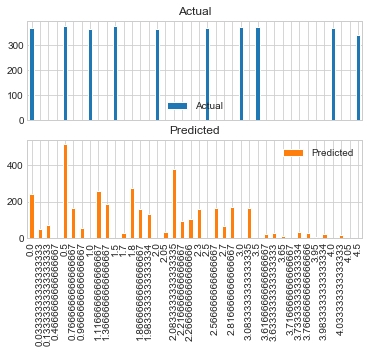

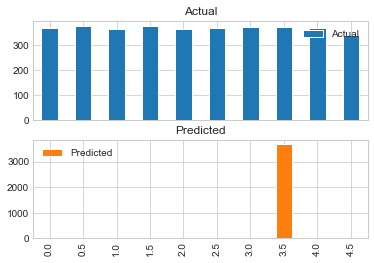

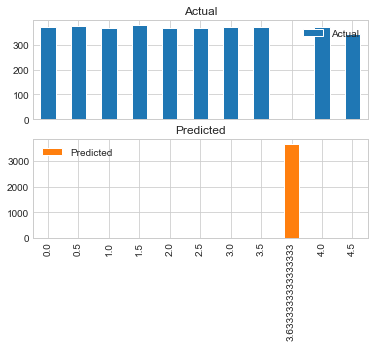

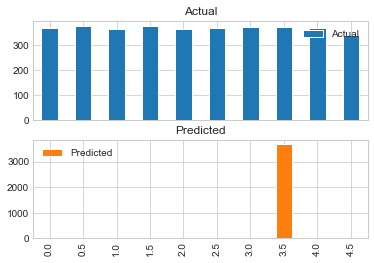

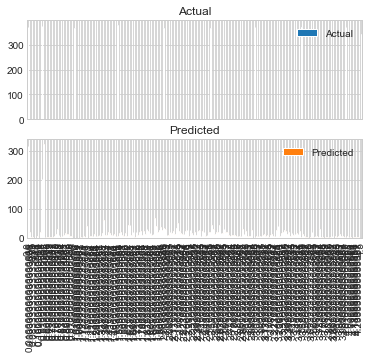

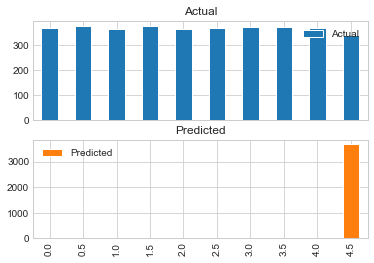

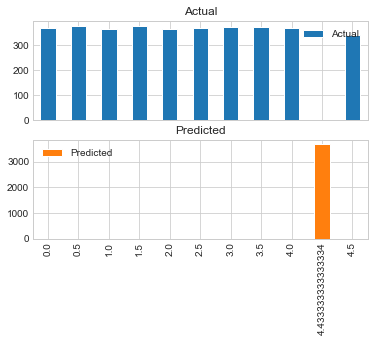

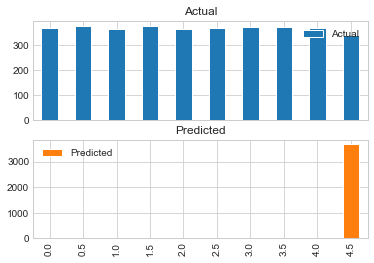

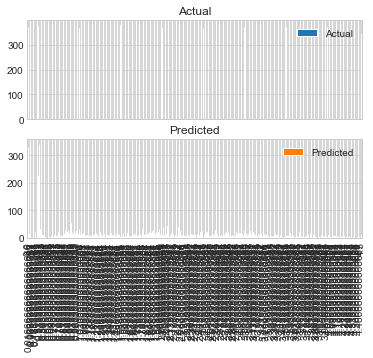

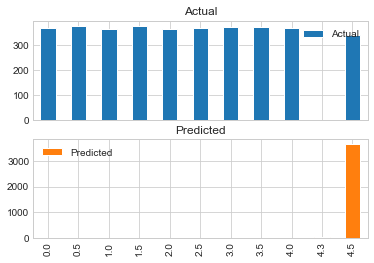

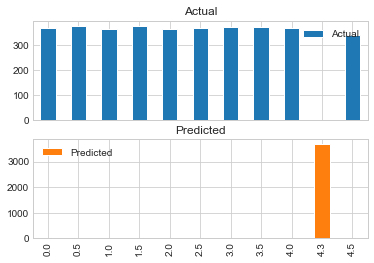

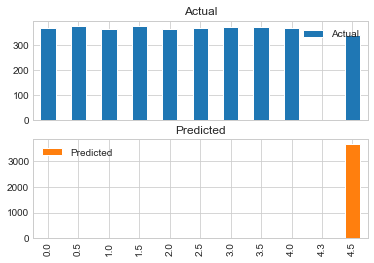

In [174]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','TunningType','Tuning']
results = list()
tuning =[True,False]
tunningTypes=['Manual','RandomizedSearchCV']
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X 
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tuneType in tunningTypes:
        if tuneType == 'RandomizedSearchCV':
            selected_algorithm_param = gridcv_results.head(1)['knn__algorithm'].values[0]
            selected_distance_param = gridcv_results.head(1)['knn__metric'].values[0]
            selected_weight_param = gridcv_results.head(1)['knn__weights'].values[0]
            selected_knn_param = gridcv_results.head(1)['knn__n_neighbors'].values[0]
        else:
            selected_algorithm_param = selected_algorithm
            selected_distance_param = selected_distance
            selected_weight_param = selected_weight
            selected_knn_param = 30
        for tune in tuning:
            if tune == True:
                model = KNeighborsRegressor(n_neighbors=selected_knn_param,algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
            else: 
                model = KNeighborsRegressor()
            trainX_data = scaler.transform(trainX_data)
            model.fit(trainX_data,train_Y)
            predict_test = model.predict(testX_data)
            coefficient_determination = sklearn.metrics.r2_score(test_Y,predict_test)
            statistical_array = list()
            error_dataframe = pd.DataFrame({'Actual': test_Y.flatten(), 'Predicted':predict_test.flatten()})
            display(error_dataframe)
            error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
            observed_errors = error_dataframe['Predicted'] - error_dataframe['Actual']
            error = pd.DataFrame(observed_errors, columns=["error"])
            result = pd.DataFrame(train_Y,columns=["distance"]).join(error)
            data = structure_data(result,coefficient_determination)
            data.append(feature)
            data.append(tuneType)
            data.append(tune)
            results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 BIG Dataset)
Experiment with testing dataset

,Actual,Predicted
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
12470,3.5,2.05
12471,3.5,2.05
12472,3.5,2.05
12473,3.5,2.05


,Actual,Predicted
0,0.0,3.5
1,0.0,3.5
2,0.0,3.5
3,0.0,3.5
4,0.0,3.5
...,...,...
12470,3.5,3.5
12471,3.5,3.5
12472,3.5,3.5
12473,3.5,3.5


,Actual,Predicted
0,0.0,3.633333
1,0.0,3.633333
2,0.0,3.633333
3,0.0,3.633333
4,0.0,3.633333
...,...,...
12470,3.5,3.633333
12471,3.5,3.633333
12472,3.5,3.633333
12473,3.5,3.633333


,Actual,Predicted
0,0.0,3.5
1,0.0,3.5
2,0.0,3.5
3,0.0,3.5
4,0.0,3.5
...,...,...
12470,3.5,3.5
12471,3.5,3.5
12472,3.5,3.5
12473,3.5,3.5


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
12470,3.5,3.333333
12471,3.5,2.933333
12472,3.5,3.300000
12473,3.5,3.233333


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
12470,3.5,4.5
12471,3.5,4.5
12472,3.5,4.5
12473,3.5,4.5


,Actual,Predicted
0,0.0,4.433333
1,0.0,4.433333
2,0.0,4.433333
3,0.0,4.433333
4,0.0,4.433333
...,...,...
12470,3.5,4.433333
12471,3.5,4.433333
12472,3.5,4.433333
12473,3.5,4.433333


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
12470,3.5,4.5
12471,3.5,4.5
12472,3.5,4.5
12473,3.5,4.5


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
12470,3.5,2.966667
12471,3.5,3.016667
12472,3.5,2.933333
12473,3.5,3.050000


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
12470,3.5,4.5
12471,3.5,4.5
12472,3.5,4.5
12473,3.5,4.5


,Actual,Predicted
0,0.0,4.3
1,0.0,4.3
2,0.0,4.3
3,0.0,4.3
4,0.0,4.3
...,...,...
12470,3.5,4.3
12471,3.5,4.3
12472,3.5,4.3
12473,3.5,4.3


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
12470,3.5,4.5
12471,3.5,4.5
12472,3.5,4.5
12473,3.5,4.5


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,TuningType,Tuning
4,0.456959,0.418347,0.646798,0.638843,-0.216667,0.016667,0.333333,1.233333,-1.783333,2.250000,0.680732,Rolling Mean RSSI,Manual,True
8,0.506763,0.497308,0.705200,0.705138,-0.483333,0.000000,0.100000,1.266667,-2.300000,3.016667,0.620472,Both,Manual,True
0,0.543717,0.617267,0.785663,0.777056,-0.533333,0.000000,0.066667,1.116667,-2.383333,2.083333,0.528924,RSSI Only,Manual,True
1,1.771543,4.448697,2.109194,1.144743,1.000000,2.000000,2.500000,3.500000,0.000000,3.500000,-2.395091,RSSI Only,Manual,False
3,1.771543,4.448697,2.109194,1.144743,1.000000,2.000000,2.500000,3.500000,0.000000,3.500000,-2.395091,RSSI Only,RandomizedSearchCV,False
2,1.904876,4.938887,2.222361,1.144743,1.133333,2.133333,2.633333,3.633333,0.133333,3.633333,-2.769186,RSSI Only,RandomizedSearchCV,True
10,2.571543,7.923166,2.814812,1.144743,1.800000,2.800000,3.300000,4.300000,0.800000,4.300000,-5.046684,Both,RandomizedSearchCV,True
6,2.704876,8.626689,2.937123,1.144743,1.933333,2.933333,3.433333,4.433333,0.933333,4.433333,-5.583588,Rolling Mean RSSI,RandomizedSearchCV,True
9,2.771383,8.991287,2.998547,1.144915,2.000000,3.000000,3.500000,4.500000,1.000000,4.500000,-5.861836,Both,Manual,False
5,2.771543,8.991784,2.998630,1.144743,2.000000,3.000000,3.500000,4.500000,1.000000,4.500000,-5.862215,Rolling Mean RSSI,Manual,False


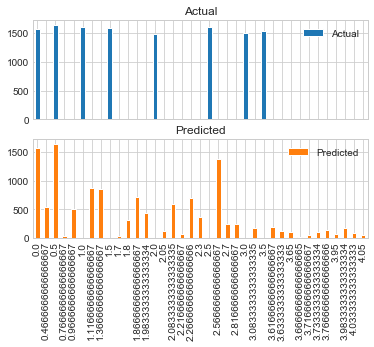

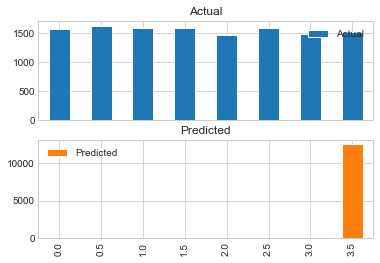

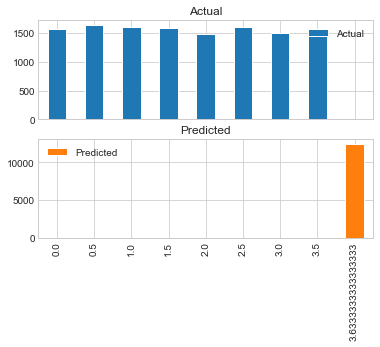

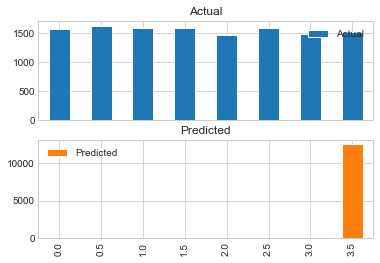

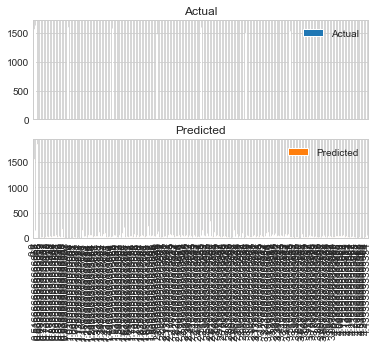

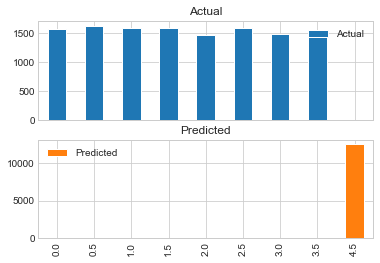

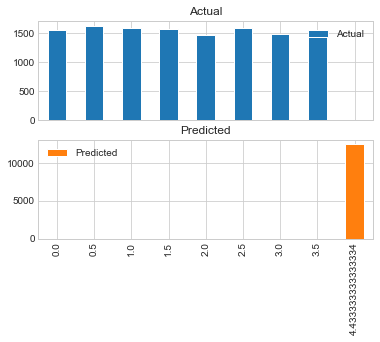

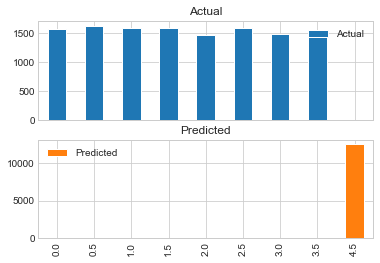

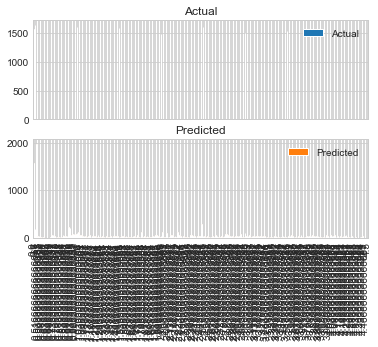

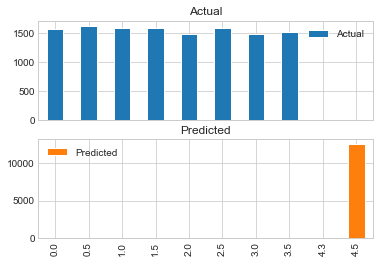

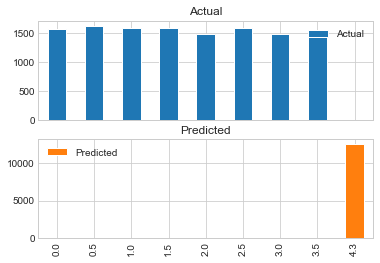

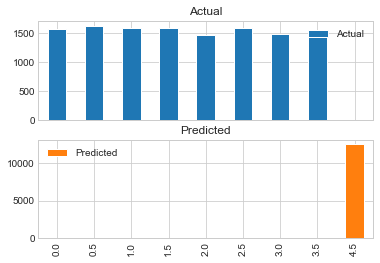

In [175]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','TuningType','Tuning']
results = list()
tuning =[True,False]
tunningTypes=['Manual','RandomizedSearchCV']
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_big
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_big
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_big
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tuneType in tunningTypes:
        if tuneType == 'RandomizedSearchCV':
            selected_algorithm_param = gridcv_results.head(1)['knn__algorithm'].values[0]
            selected_distance_param = gridcv_results.head(1)['knn__metric'].values[0]
            selected_weight_param = gridcv_results.head(1)['knn__weights'].values[0]
            selected_knn_param = gridcv_results.head(1)['knn__n_neighbors'].values[0]
        else:
            selected_algorithm_param = selected_algorithm
            selected_distance_param = selected_distance
            selected_weight_param = selected_weight
            selected_knn_param = 30
        for tune in tuning:
            if tune == True:
                model = KNeighborsRegressor(n_neighbors=selected_knn_param,algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
            else: 
                model = KNeighborsRegressor()
            trainX_data = scaler.transform(trainX_data)
            model.fit(trainX_data,train_Y)
            predict_test = model.predict(testX_data)
            coefficient_determination = sklearn.metrics.r2_score(test_Y_home_big,predict_test)
            statistical_array = list()
            error_dataframe = pd.DataFrame({'Actual': test_Y_home_big.flatten(), 'Predicted':predict_test.flatten()})
            display(error_dataframe)
            error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
            observed_errors = error_dataframe['Predicted'] - error_dataframe['Actual']
            error = pd.DataFrame(observed_errors, columns=["error"])
            result = pd.DataFrame(train_Y,columns=["distance"]).join(error)
            data = structure_data(result,coefficient_determination)
            data.append(feature)
            data.append(tuneType)
            data.append(tune)
            results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 BIG Dataset)
Experiment with testing dataset

,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
2279,3.5,2.816667
2280,3.5,1.983333
2281,3.5,1.983333
2282,3.5,3.633333


,Actual,Predicted
0,0.0,3.5
1,0.0,3.5
2,0.0,3.5
3,0.0,3.5
4,0.0,3.5
...,...,...
2279,3.5,3.5
2280,3.5,3.5
2281,3.5,3.5
2282,3.5,3.5


,Actual,Predicted
0,0.0,3.633333
1,0.0,3.633333
2,0.0,3.633333
3,0.0,3.633333
4,0.0,3.633333
...,...,...
2279,3.5,3.633333
2280,3.5,3.633333
2281,3.5,3.633333
2282,3.5,3.633333


,Actual,Predicted
0,0.0,3.5
1,0.0,3.5
2,0.0,3.5
3,0.0,3.5
4,0.0,3.5
...,...,...
2279,3.5,3.5
2280,3.5,3.5
2281,3.5,3.5
2282,3.5,3.5


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
2279,3.5,3.600000
2280,3.5,3.716667
2281,3.5,3.350000
2282,3.5,3.333333


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
2279,3.5,4.5
2280,3.5,4.5
2281,3.5,4.5
2282,3.5,4.5


,Actual,Predicted
0,0.0,4.433333
1,0.0,4.433333
2,0.0,4.433333
3,0.0,4.433333
4,0.0,4.433333
...,...,...
2279,3.5,4.433333
2280,3.5,4.433333
2281,3.5,4.433333
2282,3.5,4.433333


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
2279,3.5,4.5
2280,3.5,4.5
2281,3.5,4.5
2282,3.5,4.5


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
2279,3.5,3.683333
2280,3.5,3.383333
2281,3.5,3.300000
2282,3.5,3.783333


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
2279,3.5,4.5
2280,3.5,4.5
2281,3.5,4.5
2282,3.5,4.5


,Actual,Predicted
0,0.0,4.3
1,0.0,4.3
2,0.0,4.3
3,0.0,4.3
4,0.0,4.3
...,...,...
2279,3.5,4.3
2280,3.5,4.3
2281,3.5,4.3
2282,3.5,4.3


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
2279,3.5,4.5
2280,3.5,4.5
2281,3.5,4.5
2282,3.5,4.5


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,TuningType,Tuning
4,0.609939,0.854064,0.924156,0.877246,-0.166667,0.016667,0.418333,2.250000,-1.650000,3.216667,0.346545,Rolling Mean RSSI,Manual,True
0,0.650095,0.857792,0.926170,0.918930,-0.416667,0.000000,0.366667,1.800000,-2.383333,3.533333,0.343693,RSSI Only,Manual,True
8,0.691382,1.083341,1.040837,0.990702,-0.216667,0.016667,0.516667,2.383333,-2.250000,3.716667,0.171122,Both,Manual,True
1,1.755473,4.388682,2.094918,1.143490,1.000000,2.000000,2.500000,3.500000,0.000000,3.500000,-2.357836,RSSI Only,Manual,False
3,1.755473,4.388682,2.094918,1.143490,1.000000,2.000000,2.500000,3.500000,0.000000,3.500000,-2.357836,RSSI Only,RandomizedSearchCV,False
2,1.888806,4.874586,2.207846,1.143490,1.133333,2.133333,2.633333,3.633333,0.133333,3.633333,-2.729607,RSSI Only,RandomizedSearchCV,True
10,2.555473,7.837439,2.799543,1.143490,1.800000,2.800000,3.300000,4.300000,0.800000,4.300000,-4.996523,Both,RandomizedSearchCV,True
6,2.688806,8.536676,2.921759,1.143490,1.933333,2.933333,3.433333,4.433333,0.933333,4.433333,-5.531518,Rolling Mean RSSI,RandomizedSearchCV,True
9,2.754860,8.895722,2.982570,1.143259,2.000000,3.000000,3.500000,4.500000,1.000000,4.500000,-5.806229,Both,Manual,False
11,2.755210,8.897579,2.982881,1.143227,2.000000,3.000000,3.500000,4.500000,1.000000,4.500000,-5.807650,Both,RandomizedSearchCV,False


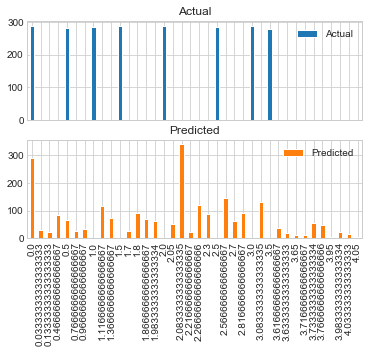

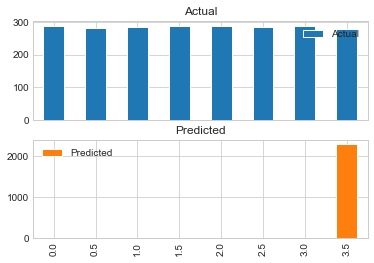

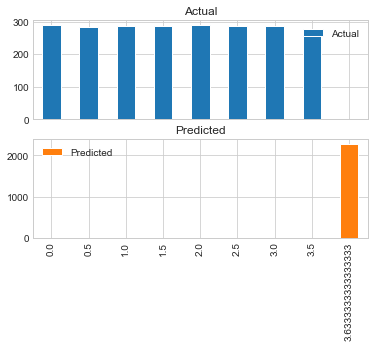

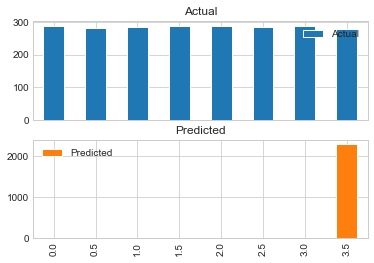

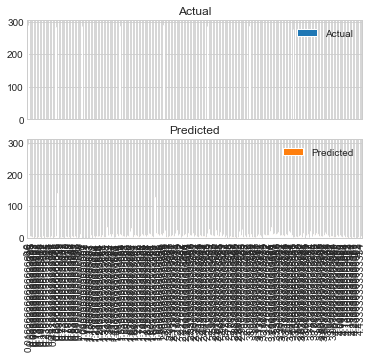

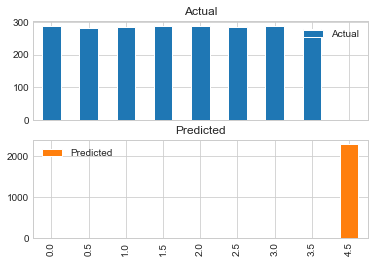

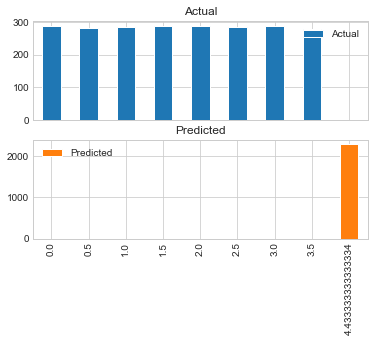

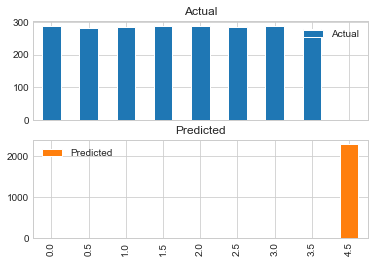

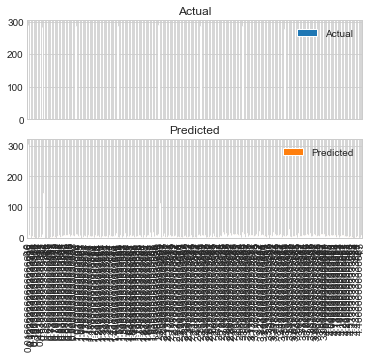

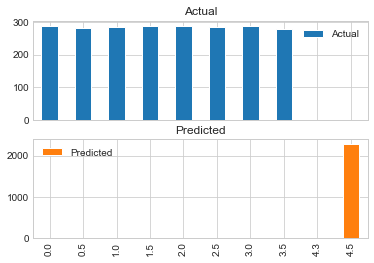

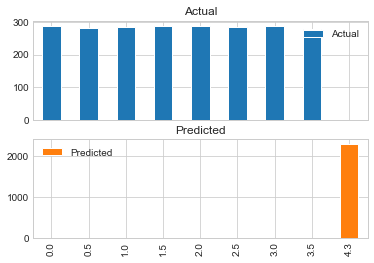

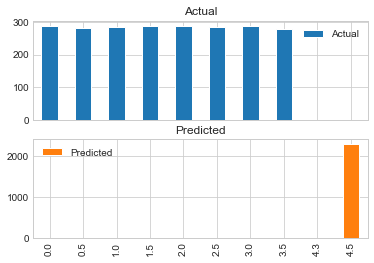

In [176]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','TuningType','Tuning']
results = list()
tuning =[True,False]
tunningTypes=['Manual','RandomizedSearchCV']
types = ['RSSI Only','Rolling Mean RSSI','Both']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_small
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_small
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_small
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tuneType in tunningTypes:
        if tuneType == 'RandomizedSearchCV':
            selected_algorithm_param = gridcv_results.head(1)['knn__algorithm'].values[0]
            selected_distance_param = gridcv_results.head(1)['knn__metric'].values[0]
            selected_weight_param = gridcv_results.head(1)['knn__weights'].values[0]
            selected_knn_param = gridcv_results.head(1)['knn__n_neighbors'].values[0]
        else:
            selected_algorithm_param = selected_algorithm
            selected_distance_param = selected_distance
            selected_weight_param = selected_weight
            selected_knn_param = 30
        for tune in tuning:
            if tune == True:
                model = KNeighborsRegressor(n_neighbors=selected_knn_param,algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
            else: 
                model = KNeighborsRegressor()
            trainX_data = scaler.transform(trainX_data)
            model.fit(trainX_data,train_Y)
            predict_test = model.predict(testX_data)
            coefficient_determination = sklearn.metrics.r2_score(test_Y_home_small,predict_test)
            statistical_array = list()
            error_dataframe = pd.DataFrame({'Actual': test_Y_home_small.flatten(), 'Predicted':predict_test.flatten()})
            display(error_dataframe)
            error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
            observed_errors = error_dataframe['Predicted'] - error_dataframe['Actual']
            error = pd.DataFrame(observed_errors, columns=["error"])
            result = pd.DataFrame(train_Y,columns=["distance"]).join(error)
            data = structure_data(result,coefficient_determination)
            data.append(feature)
            data.append(tuneType)
            data.append(tune)
            results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

### Best Results - Home Testing data (using data recovered from Android 10 SAMSUNG Galaxy A71 Small Dataset)
Experiment with testing dataset

,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
410,3.5,2.700000
411,3.5,3.733333
412,3.5,2.816667
413,3.5,2.300000


,Actual,Predicted
0,0.0,3.5
1,0.0,3.5
2,0.0,3.5
3,0.0,3.5
4,0.0,3.5
...,...,...
410,3.5,3.5
411,3.5,3.5
412,3.5,3.5
413,3.5,3.5


,Actual,Predicted
0,0.0,3.633333
1,0.0,3.633333
2,0.0,3.633333
3,0.0,3.633333
4,0.0,3.633333
...,...,...
410,3.5,3.633333
411,3.5,3.633333
412,3.5,3.633333
413,3.5,3.633333


,Actual,Predicted
0,0.0,3.5
1,0.0,3.5
2,0.0,3.5
3,0.0,3.5
4,0.0,3.5
...,...,...
410,3.5,3.5
411,3.5,3.5
412,3.5,3.5
413,3.5,3.5


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
410,3.5,3.633333
411,3.5,2.966667
412,3.5,3.333333
413,3.5,3.300000


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
410,3.5,4.5
411,3.5,4.5
412,3.5,4.5
413,3.5,4.5


,Actual,Predicted
0,0.0,4.433333
1,0.0,4.433333
2,0.0,4.433333
3,0.0,4.433333
4,0.0,4.433333
...,...,...
410,3.5,4.433333
411,3.5,4.433333
412,3.5,4.433333
413,3.5,4.433333


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
410,3.5,4.5
411,3.5,4.5
412,3.5,4.5
413,3.5,4.5


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
410,3.5,3.333333
411,3.5,3.350000
412,3.5,3.516667
413,3.5,3.100000


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
410,3.5,4.5
411,3.5,4.5
412,3.5,4.5
413,3.5,4.5


,Actual,Predicted
0,0.0,4.3
1,0.0,4.3
2,0.0,4.3
3,0.0,4.3
4,0.0,4.3
...,...,...
410,3.5,4.3
411,3.5,4.3
412,3.5,4.3
413,3.5,4.3


,Actual,Predicted
0,0.0,4.5
1,0.0,4.5
2,0.0,4.5
3,0.0,4.5
4,0.0,4.5
...,...,...
410,3.5,4.5
411,3.5,4.5
412,3.5,4.5
413,3.5,4.5


,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,TuningType,Tuning
0,0.612410,0.667266,0.816863,0.804152,-0.300000,0.050000,0.483333,1.566667,-2.383333,2.766667,0.484749,RSSI Only,Manual,True
4,0.661165,0.788086,0.887742,0.817095,0.000000,0.300000,0.750000,1.750000,-1.883333,2.716667,0.391453,Rolling Mean RSSI,Manual,True
8,0.707470,0.929416,0.964062,0.889948,0.000000,0.250000,0.830000,1.821667,-2.500000,2.966667,0.282320,Both,Manual,True
1,1.750602,4.359639,2.087975,1.139367,1.000000,2.000000,2.500000,3.500000,0.000000,3.500000,-2.366439,RSSI Only,Manual,False
3,1.750602,4.359639,2.087975,1.139367,1.000000,2.000000,2.500000,3.500000,0.000000,3.500000,-2.366439,RSSI Only,RandomizedSearchCV,False
2,1.883936,4.844244,2.200964,1.139367,1.133333,2.133333,2.633333,3.633333,0.133333,3.633333,-2.740643,RSSI Only,RandomizedSearchCV,True
10,2.550602,7.800602,2.792956,1.139367,1.800000,2.800000,3.300000,4.300000,0.800000,4.300000,-5.023493,Both,RandomizedSearchCV,True
6,2.683936,8.498541,2.915226,1.139367,1.933333,2.933333,3.433333,4.433333,0.933333,4.433333,-5.562429,Rolling Mean RSSI,RandomizedSearchCV,True
5,2.750602,8.860843,2.976717,1.139367,2.000000,3.000000,3.500000,4.500000,1.000000,4.500000,-5.842193,Rolling Mean RSSI,Manual,False
7,2.750602,8.860843,2.976717,1.139367,2.000000,3.000000,3.500000,4.500000,1.000000,4.500000,-5.842193,Rolling Mean RSSI,RandomizedSearchCV,False


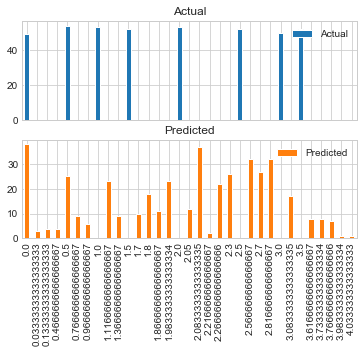

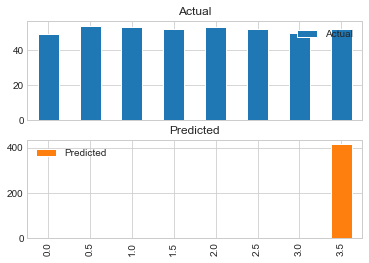

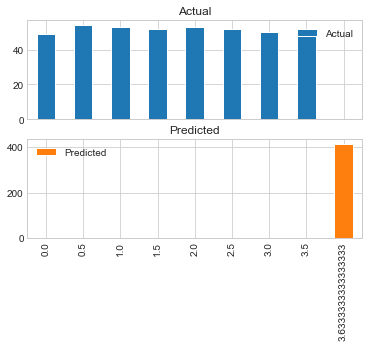

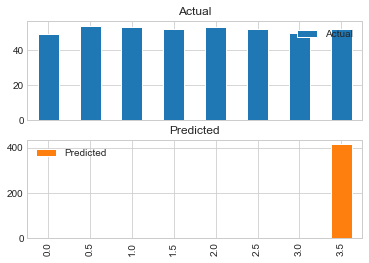

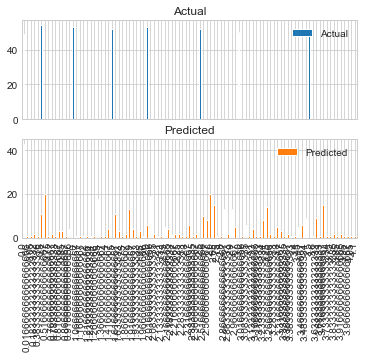

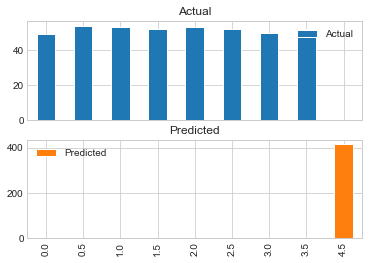

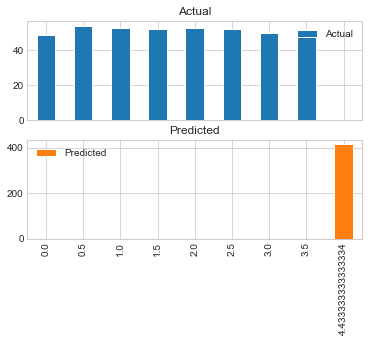

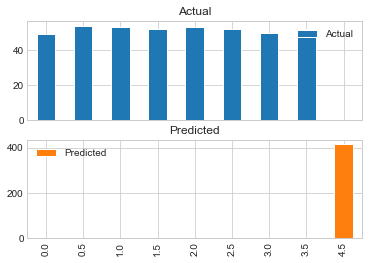

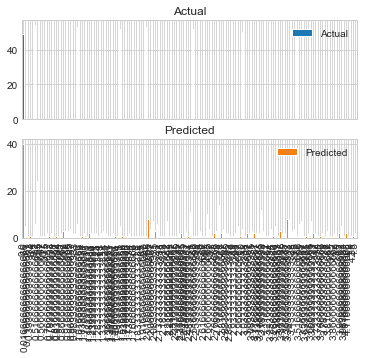

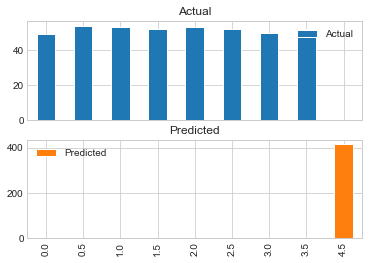

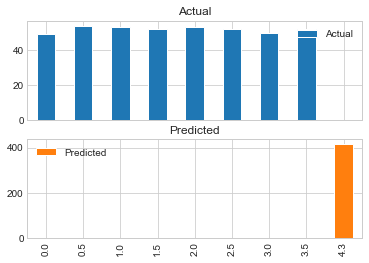

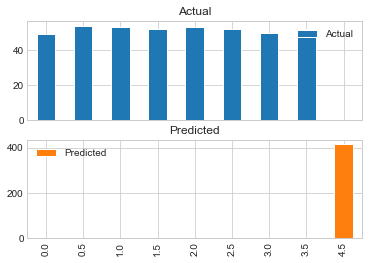

In [177]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','TuningType','Tuning']
results = list()
tuning =[True,False]
types = ['RSSI Only','Rolling Mean RSSI','Both']
tunningTypes=['Manual','RandomizedSearchCV']
for feature in types:
    #Decide on type of data
    if feature == 'RSSI Only':
        trainX_data = train_X_rssi
        testX_data = test_X_rssi_home_asus
    elif feature == 'Rolling Mean RSSI':
        trainX_data = train_X_rolling_mean
        testX_data = test_X_rolling_mean_home_asus
    else:
        trainX_data = combination_features_X
        testX_data = test_combination_features_X_home_asus
    scaler = StandardScaler()
    scaler.fit(trainX_data)
    testX_data = scaler.transform(testX_data)
    for tuneType in tunningTypes:
        if tuneType == 'RandomizedSearchCV':
            selected_algorithm_param = gridcv_results.head(1)['knn__algorithm'].values[0]
            selected_distance_param = gridcv_results.head(1)['knn__metric'].values[0]
            selected_weight_param = gridcv_results.head(1)['knn__weights'].values[0]
            selected_knn_param = gridcv_results.head(1)['knn__n_neighbors'].values[0]
        else:
            selected_algorithm_param = selected_algorithm
            selected_distance_param = selected_distance
            selected_weight_param = selected_weight
            selected_knn_param = 30
        for tune in tuning:
            if tune == True:
                model = KNeighborsRegressor(n_neighbors=selected_knn_param,algorithm=selected_algorithm_param,metric=selected_distance_param,
                                 weights=selected_weight_param)  
            else: 
                model = KNeighborsRegressor()
            trainX_data = scaler.transform(trainX_data)
            model.fit(trainX_data,train_Y)
            predict_test = model.predict(testX_data)
            coefficient_determination = sklearn.metrics.r2_score(test_Y_home_asus,predict_test)
            statistical_array = list()
            error_dataframe = pd.DataFrame({'Actual': test_Y_home_asus.flatten(), 'Predicted':predict_test.flatten()})
            display(error_dataframe)
            error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
            observed_errors = error_dataframe['Predicted'] - error_dataframe['Actual']
            error = pd.DataFrame(observed_errors, columns=["error"])
            result = pd.DataFrame(train_Y,columns=["distance"]).join(error)
            data = structure_data(result,coefficient_determination)
            data.append(feature)
            data.append(tuneType)
            data.append(tune)
            results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,TuningType,Tuning
2,0.456959,0.418347,0.646798,0.638843,-0.216667,0.016667,0.333333,1.233333,-1.783333,2.250000,0.680732,Rolling Mean RSSI,Manual,True
0,0.478128,0.502622,0.708959,0.708821,-0.316667,0.000000,0.233333,1.133333,-3.383333,3.750000,0.755545,Both,RandomizedSearchCV,None
3,0.609939,0.854064,0.924156,0.877246,-0.166667,0.016667,0.418333,2.250000,-1.650000,3.216667,0.346545,Rolling Mean RSSI,Manual,True
4,0.612410,0.667266,0.816863,0.804152,-0.300000,0.050000,0.483333,1.566667,-2.383333,2.766667,0.484749,RSSI Only,Manual,True
1,0.792349,1.193116,1.092299,1.005575,-1.083333,-0.333333,0.000000,1.336667,-2.883333,3.233333,0.415207,Rolling Mean RSSI,Manual,True


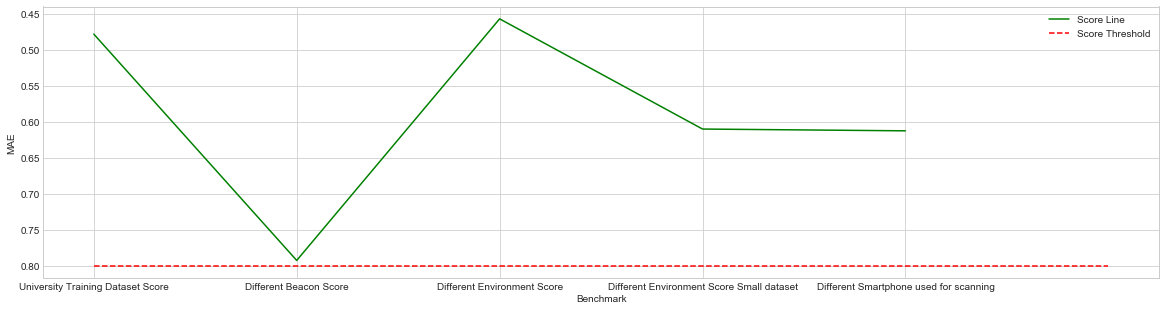

In [183]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','TuningType','Tuning']
types = ['University Training Dataset Score','Different Beacon Score','Different Environment Score','Different Environment Score Small dataset',
        "Different Smartphone used for scanning"]
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.hlines(0.8,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()